# Problem Statement

- In this challenge we need to predict whether a passenger survived or did not survived on the Titanic
- This is a <b>Classification</b> problem
- URL of the dataset https://www.kaggle.com/c/titanic

### Importing Libraries

In [1]:
# For linear algebra
import numpy as np  

# For EDA and cleaning the data
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For building a model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm
import xgboost
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

/home/afzaal/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading the data

In [2]:
train_df = pd.read_csv('train.csv')

### Miscellaneous

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

There are <b>891</b> rows and <b>12</b> columns in the data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are <b>null</b> values in the columns <b>Age</b>, <b>Cabin</b> and <b>Embarked</b><br>
There are <b>seven numerical</b> columns<br>
There are <b>five categorical</b> columns<br>

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>Statistics</b> about the numerical columns present in the data

Before moving on to <b>EDA</b>, ley's clean the data.

### Cleaning the data

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>Age column has 177 null values</b><br>
<b>Cabin column has 687 null values</b><br>
<b>Embarked column has 2 null values</b><br>

In [8]:
# replacing null values with median in Age column
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# replacing null values with mode in Embarked column
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# we will drop Cabin column from our data
train_df.drop('Cabin', axis=1, inplace=True)

In [9]:
print("Columns with their count of null values: ")
train_df.isnull().sum()

Columns with their count of null values: 


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Our data is clean now

## EDA

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


0    549
1    342
Name: Survived, dtype: int64


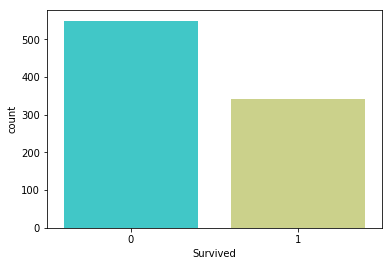

In [11]:
print(train_df.Survived.value_counts())
sns.countplot(x='Survived', data=train_df, palette='rainbow')

***0 -> did not survived<br>
***1 -> survived<br>
<b>549</b> people <b> did not survived</b><br>
<b>342</b> people <b>survived<b><br>

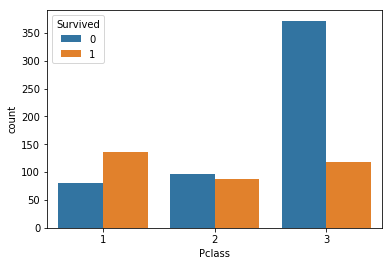

In [12]:
sns.countplot(x='Pclass',hue='Survived',data=train_df)

***Pclass -> Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd***<br>
People who were in <b>Pclass 1</b> survived the most<br>
Most of the people from <b>Pclass 3</b> did not survived<br>

<b>Reason:</b><br>
- One reason could be more priority was given to Pclass 1 people than Pclass 3 people<br>

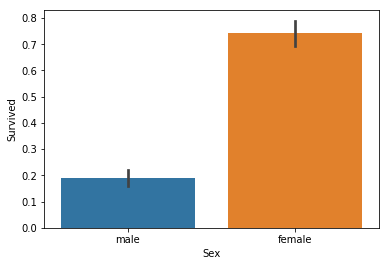

In [13]:
sns.barplot(x='Sex', y='Survived', data=train_df)

<b>Females survived</b> the most<br>
<b>Reason:</b><br>

- Usually, females are given more priority than males. Because, naturally males are stronger than females.

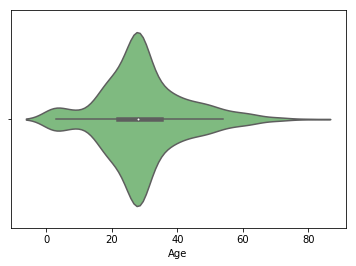

In [14]:
sns.violinplot(x='Age', data=train_df, palette='Greens_r')

<b>Most of the people in the dataset are between the ages 20 and 40</b><br>

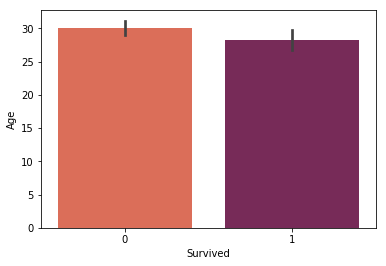

In [15]:
sns.barplot(x='Survived', y='Age', data=train_df, palette='rocket_r')

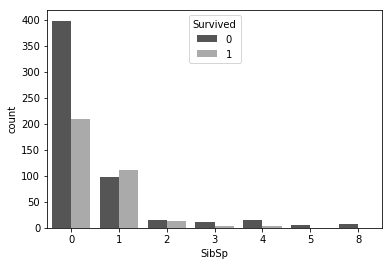

In [16]:
sns.countplot(x='SibSp', hue='Survived',data=train_df, palette='binary_r')

***SibSp -> Number of siblings / spouses aboard the Titanic*** <br>
Most of the people who <b>survived had no Siblings/Spouses</b><br>
People with more Siblings/Spouses were not able to survive<br>

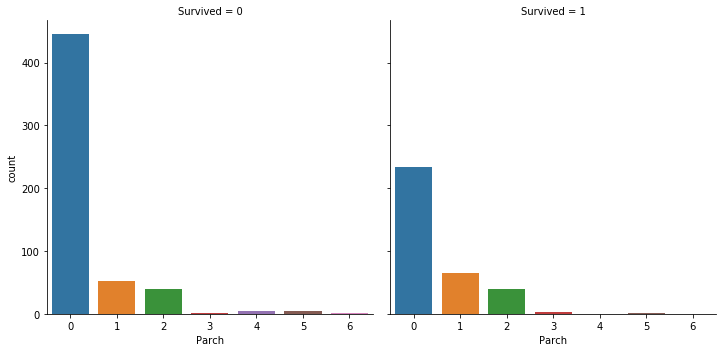

In [17]:
sns.catplot(x='Parch', data=train_df, kind='count', col='Survived')

***Parch -> Number of parents / children aboard the Titanic***<br>
People with <b>no Parents/Children</b> Survived the most<br>

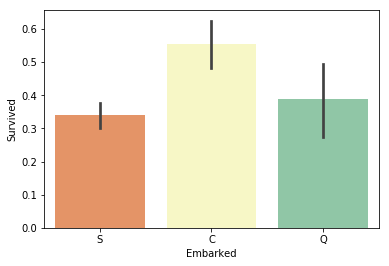

In [18]:
sns.barplot(x='Embarked', y='Survived', data=train_df, palette='Spectral')

***Embarked -> Port of Embarkation C = Cherbourg(France), Q = Queenstown(New Zealand), S = Southampton(England)***<br>
Most of the people who boarded from <b>Cherbourg</b> survived the most

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Removing redundant features

Features going to be removed
- PassengerId
- Name
- Ticket

In [20]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Converting categorical features to numerical features

<b>Most machine learning algorithms can't work on text data. So, we need to convert text to numbers.</b><br>

There are many techniques, mostly used ones are described below:
- Use <b>Label Encoding</b> for ordinal(Which has order) columns
- Use <b>One-Hot Encoding</b> for nominal(which doesn't have any order in them) columns<br>
Here's a link to learn about ordinal and nominal columns:
https://sciencing.com/difference-between-nominal-ordinal-data-8088584.html

Nominal columns: <b>Sex</b><br>
Ordinal columns: <b>Embarked</b><br>

In [22]:
lb = LabelEncoder()

In [23]:
lb.fit(train_df.Embarked)

LabelEncoder()

In [24]:
train_df['Embarked'] = lb.transform(train_df.Embarked)

In [25]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


In [26]:
lb.classes_

array(['C', 'Q', 'S'], dtype=object)

<b>Label Encoder replaced 'C' with 0, 'Q' with 1 and 'S' with 2</b><br>

In [27]:
train_df = pd.get_dummies(train_df) # One-Hot Encoding is also called dummy encoding, we use pd.get_dummies func

In [28]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,2,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,2,1,0
3,1,1,35.0,1,0,53.1000,2,1,0
4,0,3,35.0,0,0,8.0500,2,0,1


How does One-Hot Encoding work?<br>
- It extracts the all the <b>categories</b> and makes them columns. In our case Male and Female<br>
- Whenever there occurs a <b>Female</b> in the Sex column, it places <b>1</b> in the <b>Sex_female</b> column and <b>0</b> in the <b>Sex_male</b> column<br>
Link to learn more about One-Hot Encoding: https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science

### Splitting the data

In [29]:
# X contains all the columns except the Survived columns, becuase predictions will be made on Survived column
# Y contains only the Survived column
# Note: the column we are going to predict is also called target

X = train_df.drop('Survived', axis=1)
y = train_df.Survived

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print(f"Training size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")

Training size: 712
Testing size: 179


We will train our model on <b>712</b> rows<br>
We will test our model on <b>179</b> rows</b>

### Training the model

- We'll use many models to train on and choose the one which gives the best accuracy

#### GradientBoostingClassifier

In [32]:
gbm = GradientBoostingClassifier(n_estimators=1000)

In [33]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [34]:
gbm_preds = gbm.predict(X_test)

In [35]:
metrics.accuracy_score(y_test, gbm_preds)

0.7932960893854749

#### RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_jobs=2, n_estimators=500, oob_score=True)

In [37]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [38]:
rfc_preds = rfc.predict(X_test)

In [39]:
metrics.accuracy_score(y_test, rfc_preds)

0.7932960893854749

#### LGBMClassifier

In [40]:
lgbm = lightgbm.LGBMClassifier()

In [41]:
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
lgbm_preds = lgbm.predict(X_test)

In [43]:
metrics.accuracy_score(y_test, lgbm_preds)

0.7877094972067039

#### XGBClassifier

In [44]:
xgb = xgboost.XGBClassifier(n_jobs=2, n_estimators=500, base_score=0.7)

In [45]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [46]:
xgb_preds = xgb.predict(X_test)

In [47]:
metrics.accuracy_score(y_test, xgb_preds)

0.7988826815642458

#### ExtraTreeClassifier

In [48]:
etc = ExtraTreesClassifier(n_jobs=2, bootstrap=True, oob_score=True, verbose=2, n_estimators=1000)

In [49]:
etc.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000building tree 4 of 1000

building tree 5 of 1000building tree 6 of 1000

building tree 7 of 1000building tree 8 of 1000

building tree 9 of 1000building tree 10 of 1000

building tree 11 of 1000building tree 12 of 1000

building tree 13 of 1000building tree 14 of 1000

building tree 15 of 1000building tree 16 of 1000

building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000building tree 20 of 1000

building tree 21 of 1000building tree 22 of 1000

building tree 23 of 1000building tree 24 of 1000

building tree 25 of 1000building tree 26 of 1000

building tree 27 of 1000building tree 28 of 1000

building tree 29 of 1000building tree 30 of 1000

building tree 31 of 1000building tree 32 of 1000

building tree 33 of 1000building tree 34 of 1000

building tree 35 of 1000building tree 36 of 1000

building tree 37 of 1000building tree 38 of 1000

building tree 39 of 1000building tree 40 of 1000

building 

[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.3s


building tree 258 of 1000building tree 259 of 1000

building tree 260 of 1000building tree 261 of 1000

building tree 262 of 1000building tree 263 of 1000

building tree 264 of 1000
building tree 265 of 1000
building tree 266 of 1000
building tree 267 of 1000
building tree 268 of 1000
building tree 269 of 1000
building tree 270 of 1000
building tree 271 of 1000
building tree 272 of 1000building tree 273 of 1000

building tree 274 of 1000building tree 275 of 1000

building tree 276 of 1000building tree 277 of 1000

building tree 278 of 1000building tree 279 of 1000

building tree 280 of 1000
building tree 281 of 1000
building tree 282 of 1000
building tree 283 of 1000
building tree 284 of 1000
building tree 285 of 1000
building tree 286 of 1000
building tree 287 of 1000
building tree 288 of 1000
building tree 289 of 1000
building tree 290 of 1000
building tree 291 of 1000
building tree 292 of 1000
building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tre

[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.6s


building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000building tree 399 of 1000

building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000building tree 409 of 1000

building tree 410 of 1000building tree 411 of 1000

building tree 412 of 1000building tree 413 of 1000

building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000building tree 425 of 1000

building tree 426 of 1000
building tree 427 of 1000building tree 428 of 1000

building tree 429 of 1000building tree 430 of 1000

building tree 431 of 1000building tree 432 of 1000

building tree 433 of 1000building tree

[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    1.0s


building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000building tree 689 of 1000

building tree 690 of 1000building tree 691 of 1000

building tree 692 of 1000building tree 693 of 1000

building tree 694 of 1000building tree 695 of 1000

building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000building tree 699 of 1000

building tree 700 of 1000building tree 701 of 1000

building tree 702 of 1000building tree 703 of 1000

building tree 704 of 1000building tree 705 of 1000

building tre

[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.5s finished


ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
           oob_score=True, random_state=None, verbose=2, warm_start=False)

In [50]:
etc_preds = etc.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [51]:
metrics.accuracy_score(y_test, etc_preds)

0.8044692737430168

#### AdaBoostClassifier

In [52]:
adbc = AdaBoostClassifier(n_estimators=500, learning_rate=0.04)

In [53]:
adbc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.04, n_estimators=500, random_state=None)

In [54]:
adbc_preds = adbc.predict(X_test)

In [55]:
metrics.accuracy_score(y_test, adbc_preds)

0.7821229050279329

#### DecisionTreeClassifier

In [56]:
dtc = DecisionTreeClassifier()

In [57]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
dtc_preds = dtc.predict(X_test)

In [59]:
metrics.accuracy_score(y_test, dtc_preds)

0.770949720670391

#### LogisticRegression

In [60]:
lg = LogisticRegression(max_iter=1000, verbose=4, n_jobs=3, dual=True)

In [61]:
lg.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn', n_jobs=3,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=4, warm_start=False)

In [62]:
lg_preds = lg.predict(X_test)

In [63]:
metrics.accuracy_score(y_test, lg_preds)

0.7653631284916201

### Predicting on Test Data using LGBM

In [64]:
test_df = pd.read_csv('test.csv')

In [65]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
PassengerId = test_df.PassengerId

In [67]:
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [68]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [69]:
# replacing null values with median in Age column
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# replacing null values with mode in Embarked column
test_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [70]:
lb.fit(test_df.Embarked)

LabelEncoder()

In [71]:
test_df.Embarked = lb.transform(test_df.Embarked)

In [72]:
test_df = pd.get_dummies(test_df)

In [73]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,2,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,2,0,1
4,3,22.0,1,1,12.2875,2,1,0


In [74]:
predictions = lgbm.predict(test_df)

In [75]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
submit_df = pd.DataFrame()

In [77]:
submit_df['PassengerId'] = PassengerId
submit_df['Survived'] = predictions

In [78]:
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [79]:
submit_df.to_csv('submission.csv', index=False)